# Focal-H straws



In [1]:
from straws import *
from sympy import symbols, sin, pi, rad, Eq

## Relative coordinates of centres

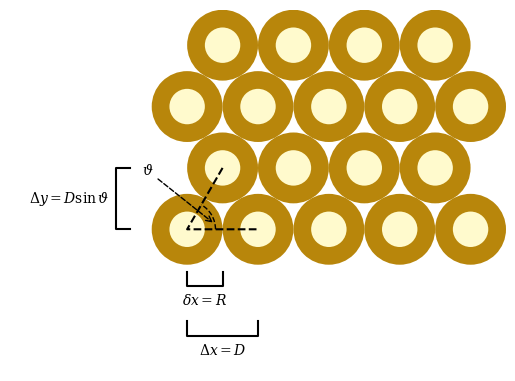

In [2]:
fig1()

The straws, a cobber tube with a scintillator fibre in it, of the FoCal-H are arranged as shown above.  We will label columns and rows starting in the lower left corner starting at 0.  The angle $\vartheta=60^0$ degrees, and the radius of the straws are $R$, and diameter $D=2R$. 

In [3]:
theta = 60
R = symbols('R',real=True,positive=True)
D = 2 * R

The vertical distance between rows is $\sin\theta$ 

In [4]:
DeltaY = D*sin(rad(theta))
Eq(symbols(r'Delta_y'),DeltaY,evaluate=False)

Eq(Delta_y, sqrt(3)*R)

The horizontal distance between columns is simple $D$, but every second row is shifted horizontally by $\delta x=R$. 

In [5]:
DeltaX = D
deltaX = R
display(Eq(symbols(r'Delta_x'),DeltaX,evaluate=False),
        Eq(symbols(r'delta_x'),deltaX,evaluate=False))

Eq(Delta_x, 2*R)

Eq(delta_x, R)

With this, we get the following expression for the coordinates $(x,y)$ of a straw in column $c$ and row $r$ (labelled $[c,r]$).

In [6]:
c, r = symbols('c r',integer=True,nonnegative=True)
x    = (c * D + R * (r % 2)).simplify()
y    = r * DeltaY
display(Eq(symbols('x'),x,evaluate=False),
        Eq(symbols('y'),y,evaluate=False))

Eq(x, R*(2*c + Mod(r, 2)))

Eq(y, sqrt(3)*R*r)

This of courses placed the straw $[0,0]$ at $(x,y)=(0,0)$. 

## Size of the package

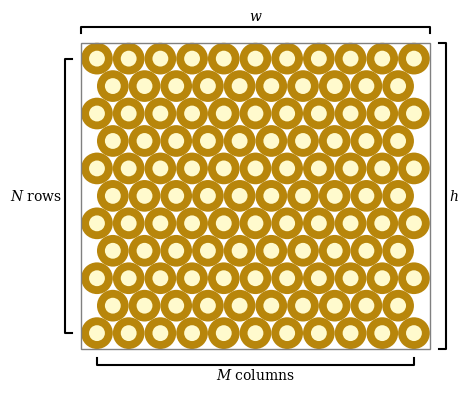

In [7]:
fig2()

If we pack $M$ columns and $N$ rows into a package, we get a layout as shown above.  We want to know how big the box, indicated by the gray rectangle, will be.  That is we need to determine $w$ and $h$ as shown above. 

We can easily determine the horizontal and vertical distanced between the centres of the first and last straw in a row and column, respectively.  For these, we get 

In [8]:
M, N = symbols('M N',integer=True,postive=True)
dw   = (M-1) * D
dh   = (N-1) * DeltaY 
display(Eq(symbols('d_w'),dw,evaluate=False),
        Eq(symbols('d_h'),dh,evaluate=False))

Eq(d_w, 2*R*(M - 1))

Eq(d_h, sqrt(3)*R*(N - 1))

However, in the both directions, we need to take into account the two half-diameters of the first and last straw.  We therefore need to add $2R$ to $d_w$ and $d_h$ to get the total width and height.  

In [9]:
w = (dw + 2*R).simplify()
h = (dh + 2*R).simplify()
display(Eq(symbols('w'),w,evaluate=False),
        Eq(symbols('h'),h,evaluate=False))

Eq(w, 2*M*R)

Eq(h, R*(sqrt(3)*(N - 1) + 2))

## Placing the straws

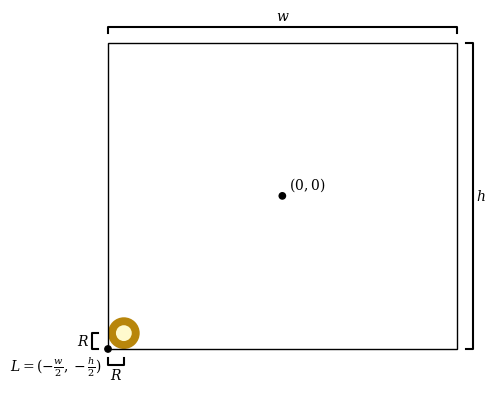

In [10]:
fig3()

In our geometric description, the box defines the local coordinate system for the straws.  The origin of that coordinate system is in the centre of the box $B$, and the lower left corner $L$ is at $(-w/2,-h/2)$ as shown above.

We want place straw $[0,0]$ in the very lower left corner in, such that it is inside the box, as shown above.  That means that the centre of the $[0,0]$ straw should be at $(-w/2+R,-h/2+R)$.  Thus are local coordinates in the box are given by 

In [11]:
xB = (x - w/2 + R).simplify().factor()
yB = (y - h/2 + R).simplify().factor()
display(Eq(symbols('x_B'),xB,evaluate=False),
        Eq(symbols('y_B'),yB,evaluate=False))

Eq(x_B, R*(-M + 2*c + Mod(r, 2) + 1))

Eq(y_B, sqrt(3)*R*(-N + 2*r + 1)/2)

We see that the radius $R$ is a common pre-factor, and that the expression can be written as 

\begin{align*}
  \begin{pmatrix}x_B\\y_B\end{pmatrix}
  &= R \begin{pmatrix}
  2c + 1 - M + (r\bmod2)\\
  \frac{\sqrt{3}}2\left(2r + 1 - N\right)
  \end{pmatrix}\quad.
\end{align*}

# Full row set-up 

Above, we assumed that every second row had one less straw than the full number.  If we instead have a full number of straws in each row, then we get a package as shown below. 

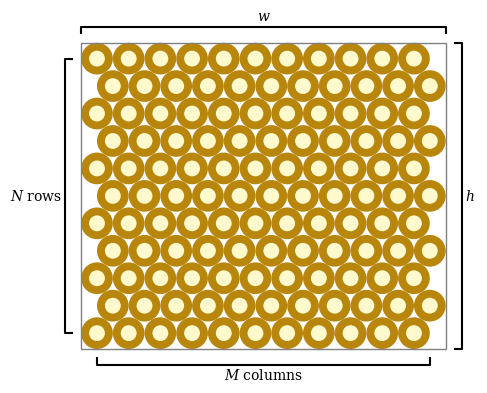

In [12]:
fig2a()

The height of the box is the same as before, but the width becomes 

In [13]:
wa = (dw + 2*R + R).simplify()
display(Eq(symbols('w'),wa,evaluate=False),
        Eq(symbols('h'),h,evaluate=False))

Eq(w, R*(2*M + 1))

Eq(h, R*(sqrt(3)*(N - 1) + 2))

Thus, we the placement of a straw is modified to 

In [32]:
xBa = (x - wa/2 + R).simplify()
display(Eq(symbols('x\'_B'),xBa,evaluate=False),
        Eq(symbols('y_B'),yB,evaluate=False))

Eq(x'_B, R*(-2*M + 4*c + 2*(Mod(r, 2)) + 1)/2)

Eq(y_B, sqrt(3)*R*(-N + 2*r + 1)/2)

which differs from the previous $x_B$ by 

In [35]:
Eq((symbols('x\'_B')-symbols('x_B'))/symbols('R'),((xBa-xB)/R).simplify())

Eq((x'_B - x_B)/R, -1/2)

and we can write 

\begin{align*}
  \begin{pmatrix}x_B\\y_B\end{pmatrix}
  &= R \begin{pmatrix}
  2c + 1 - M + (r\bmod2) - \frac12\\
  \frac{\sqrt{3}}2\left(2r + 1 - N\right)
  \end{pmatrix}\quad.
\end{align*}

# Towers of straws 

By "tower" we mean $m\times n$ scintillating fibres in side the same cabilary copper tubes connected to a single Si-PMT (silicon photo-multiplier tube).  

In [ ]:
fig4()

The figure above shows a tower of $4\times3$ straws.  

**Note**: Two horizontally adjacent towers overlap in $x$, as indicated by the dashed box above.  This means we have to take extra care when placing our volumes.  One option is to use assemblies (`TGeoVolumeAssembly`), and another option is to use a polygonial shape for the mother volume.  More on this later - for now we focus on the content of the towers. 

The $m\times n$ fibres 

## LIgth guides to Si-PMTs

The scintillating fibres extend out of copper cabilary tubes to connect up with the PMTs.  If the size of the whole detector is $M\times N$ columns and rows, then $m\times n$ fibres connect to a single PMT, and we denote the $z$ distance from the end of the cabilary tubes to the PMTs to be $A$. 

At the PMTs the fibres are packed as closely together as possible.  In reality, this means that the centres of the fibres are $2\times R'$ away from each other, where $R'$ is the radius of the fibres.  However, in the geometric description we need to model this extension slightly differently (by a `TGeoCtub` shape) which is a cylidender (or `TGeoTube`) with two non-perpendicular cuts in either end.  The angle of sections is denoted $\alpha$, and the semi-major axis $a$ of the resulting ellipse is given by 

$$a = \frac{R'}{\sin\alpha}\quad.$$

The angle $\alpha$ depends on which fibre in the bundle we are considering: Fibres that are on the peripery of the bundle would have a _smaller_ $\alpha$, while fibres in the middle have $\alpha$ very close to $90^{\circ}$. 
However, to simplify things abit, we will assume that $\alpha$ is the same for all fibres, and relatively close to $90^{\circ}$ and so we set 

$$a = (1+f)R'\quad,$$

where $f$ is some number smaller than 1. 

We can use the same expression as a above to find the centre location of the fibres in the bundles, replacing $a$ for $R$.  Thus, we have that $(x,y)$ coordinates of the $[c,r]$ fibre in the bundle is given by 

In [ ]:
# a    = symbols('a',real=True,positive=True)
# m, n = symbols('m n', integer=True,positive=True)
# x2 = xB.subs({R:a,M:m,N:n})
# y2 = yB.subs({R:a,M:m,N:n})
# display(Eq(symbols('x_2'),x2,evaluate=False),
# 
#     Eq(symbols('y_2'),y2,evaluate=False))

Note, that we have also replaced $M\rightarrow m$ and $N\rightarrow n$, as these are the sizes of the bundles. 

If we define a 3D coordinate system with its origo in the middle of the bundle and half-ways between the end of the cabilary tubes and the PMTs, we have the 2 vectors, $v_1$ and $v_2$, that define the point where the light guard starts and ends, respectively. 


In [ ]:
# from sympy.vector import CoordSys3D
# Sys = CoordSys3D('Sys')
# O   = Sys.origin
# A   = symbols('A',real=True,positive=True)
# x1  = xB.subs({M:m,N:n})
# y1  = yB.subs({M:m,N:m})
# v1  = (x1*Sys.i+y1*Sys.j-A*Sys.k).simplify().factor()
# v2  = (x2*Sys.i+y2*Sys.j+A*Sys.k).simplify().factor()
# display(Eq(symbols("v_1"),v1.to_matrix(Sys),evaluate=False),
#         Eq(symbols("v_2"),v2.to_matrix(Sys),evaluate=False))
# 

We can calculate $v_2 - v_1$ to get the direction vector between the two points 

In [ ]:
vv  = (v2-v1).simplify()
display(Eq(symbols('v_n'),Eq(symbols('v_2')-symbols('v_1'),vv.to_matrix(Sys),evaluate=False),evaluate=False))

and of course the mid-point $v_m$ between the two

In [ ]:
vm = ((v2+v1)/2).simplify().factor()
display(Eq(symbols("v_m"),vm.to_matrix(Sys),evaluate=False))

In [ ]:
vv.magnitude().simplify()

In [ ]:
# 
# def extended_express(expr,coordsys):
#     """
#     express for vectors allowing transformation between
#     cartesian (x,y,z) and non-cartesian frames (eg cylindrical)
#     Parameters
#     ==========
#     expr : Vector
#         The expression to re-express in CoordSys3D 'coordsys'
#     system: CoordSys3D
#         The coordinate system the expr is to be expressed in
#     Examples
#     =========
#     >>> from sympy.vector import extended_express, CoordSys3D
#     >>> from sympy import pi
#     >>> N = CoordSys3D('N')
#     >>> C = N.create_new('C', transformation='cylindrical', \
#         vector_names = ('r', 'theta', 'z'))
#     >>> extended_express(5*N.i,C)
#     5*C.r
#     >>> extended_express(5*N.j,C)
#     5*C.r + pi/2*C.theta
#     >>> extended_express(10*N.k,C)
#     10*C.z
#     >>> extended_express(6*C.r,N)
#     6*N.i
#     >>> extended_express(6*C.r + pi/2*C.theta,N)
#     6*N.j
#     Where a coordinate is undefined (eg theta with
#     extended_express(N.k), it is mapped to zero.
#     The non-cartesian frame must be defined as a child of the
#     cartesian frame as above.
#     The output is expressed in terms of the base vectors of the
#     derived coordinate systems. Currently they default to i,j
#     and k which are confusing for non-cartesian systems so it
#     is recommended to explicitly name them as above.
#     See Also
#     ========
#     CoordSys3D.transformation_from_parent,
#     CoordSys3D.transformation_to_parent
#     """
#     from sympy.vector import Vector, CoordSys3D 
#     from sympy import nan
#     
#     if not isinstance(coordsys, CoordSys3D):
#         raise TypeError("system should be a CoordSys3D instance")
#              # check we are expressing in a frame
# 
#     parts=expr.separate()
#     # get different coordinate frames in vector, cry if more than one
# 
#     if isinstance(parts,dict):
#         if(len(parts) == 0): return Vector.zero
#              # we have been given zero vector
#         if(len(parts) > 1):  raise ValueError("Does not support \
#             expressions containing multiple base coordinate frames")
# 
#         foundframe = tuple(parts.keys())[0]
#         foundvector = tuple(parts.values())[0]
#     else:
#         foundframe = parts.system
#         foundvector = parts
# 
#     # we should now have found the only frame in the vector,
#     # and we now have to convert it to the given frame
# 
#     from_frame = foundframe
#     to_frame = coordsys
# 
#     from_coeffs1 = from_frame.base_vectors()
#     from_coeffs2 = from_frame.base_scalars()
#     to_coeffs = to_frame.base_vectors()    # output with vectors
# 
#     if from_frame._parent == to_frame:
#         transform_function = from_frame._transformation_lambda
#     else:
#         if to_frame._parent == from_frame:
#             transform_function =  \
#                 to_frame._transformation_from_parent_lambda
#         else:
#             raise ValueError("Cannot link Coordinate frames")
#     args=[]
# 
#     for i,j in zip(from_coeffs1,from_coeffs2):
#            # could be expressed in either for inertial frame
#         coeff1 = foundvector.coeff(i)
#            # understand both N.i and N.x (or C.r and C.i)
#         coeff2 = foundvector.coeff(j)
#         if coeff1 != 0 and coeff2 !=0 :
#             raise ValueError("Cannot express vector with both base \
#                       vectors and base scalars - check your vector")
#         args.append(coeff1 + coeff2) # only one can be non-zero
# 
#     vals=transform_function(*args)
# 
#     ans=Vector.zero
# 
#     for v,c in zip(vals,to_coeffs):
#         if v is nan:  # v is nan ie infinity from an arctan
#             v = 0
#         # use to solve for cylindrical coords
#         # where theta is undefined
#         ans += v*c
#     return ans
# 
# def is_non_cartesian_frame(system):
#     """
#     dummy function to detect if a frame is non cartesian
#     currently no solution found, as triggered by rotations
#     as well, corrupting express when working with these
#     """
#     if system._transformation_from_parent_lambda is not None: return True
#     return False

In [ ]:
# Sph = Sys.create_new('Sph', transformation='spherical')
# vp = Sys.origin.locate_new('vp',vv)
# from sympy.vector import express
# extended_express(vv,Sph).simplify().to_matrix(Sph)